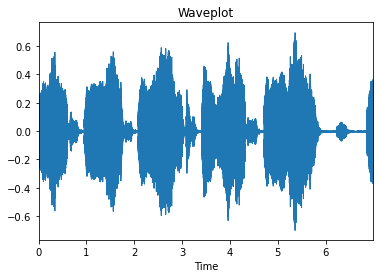

In [1]:
# 3-4-04
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')

# waveplot
y, sr = librosa.load('discomfort/discomfort_1.wav')

librosa.display.waveplot(y, sr=sr)

plt.title('Waveplot')
plt.show()

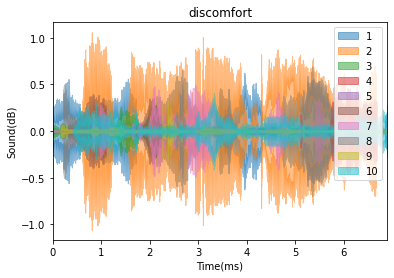

In [2]:
# 3-4-05
# 하나의 그래프에 여러 개의 소리 데이터 표현_discomfort
folder = ['discomfort', 'hungry', 'laugh', 'tired']
set_label=[]

for i in range(1,11):
    a = folder[0]+'/'+folder[0]+'_'+str(i)+'.wav'
    y, sr = librosa.load(a)
    librosa.display.waveplot(y, sr=sr, alpha=0.5)
    set_label.append(i)
    
plt.legend(set_label)
plt.title(folder[0])
plt.xlabel("Time(ms)")
plt.ylabel("Sound(dB)")
plt.show()

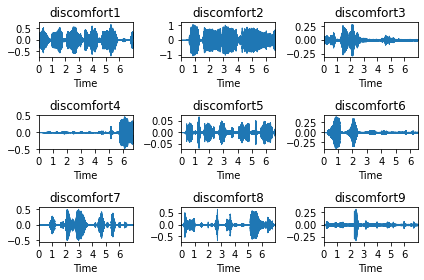

In [3]:
# 3-4-06
# 하나의 그래프에 여러 개의 소리 데이터 표현-discomfort-화면 분할
for i in range(1,10):
    plt.subplot(3,3,i)
    a = folder[0]+'/'+folder[0]+'_'+str(i)+'.wav'
    y, sr = librosa.load(a)
    librosa.display.waveplot(y, sr=sr)
    plt.title(folder[0]+str(i))
    
plt.tight_layout()
plt.show() 

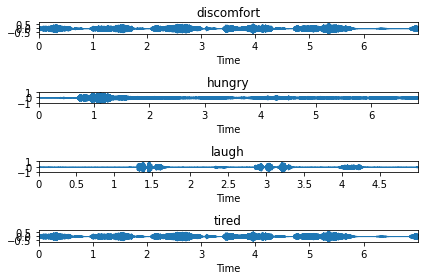

In [4]:
# 3-4-07
# 하나의 그래프에 여러 개의 소리 데이터 표현-4가지 상황
for i in range(0,4):
    plt.subplot(4,1,i+1)
    a = folder[i]+'/'+folder[i]+'_1.wav'
    y, sr = librosa.load(a)
    librosa.display.waveplot(y, sr=sr)
    plt.title(folder[i])

plt.tight_layout()
plt.show() 

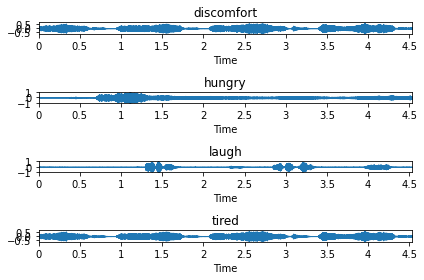

In [5]:
# 3-4-08
# 하나의 그래프에 여러 개의 소리 데이터 표현-4가지 상황, 동일 시간
for i in range(0,4):
    plt.subplot(4,1,i+1)
    a = folder[i]+'/'+folder[i]+'_1.wav'
    y, sr = librosa.load(a)
    librosa.display.waveplot(y[:100000], sr=sr)
    plt.title(folder[i])
    
plt.tight_layout()
plt.show()

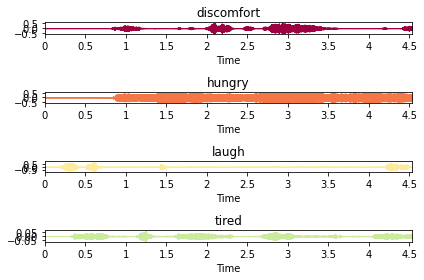

In [6]:
# 3-4-09
# 하나의 그래프에 여러 개의 소리 데이터 표현 - 4가지 상황, 동일 시간, 다른 색
for i in range(0,4):
    plt.subplot(4,1,i+1)
    a = folder[i]+'/'+folder[i]+'_7.wav'
    y, sr = librosa.load(a)
    librosa.display.waveplot(y[:100000], sr=sr, color=plt.cm.Spectral(i*55))
    plt.title(folder[i])
    
plt.tight_layout()
plt.show()

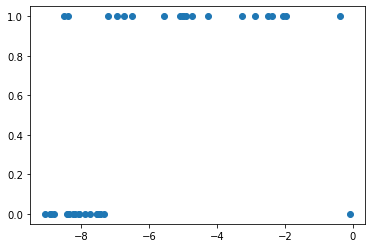

In [7]:
# 3-4-11
# 입력변수와 출력변수 생성하기
X_train = np.zeros((40,20))
y_train = np.zeros(40)

#인덱스번호 0~19번까지는 레이블 1(배고픔), 21~40번까지는 레이블 0(웃음)
y_train[0:20] = 1

# hungry_특징추출  
for i in range(20):
    audio_path = 'hungry/hungry_'+str(i+1)+'.wav'
    y, sr = librosa.load(audio_path)
    mfcc = librosa.feature.mfcc(y = y, sr = sr)
    temp = mfcc.mean(axis = 1)
    X_train[i] = temp

# laugh_특징추출  
for i in range(20):
    audio_path = 'laugh/laugh_'+str(i+1)+'.wav'
    y, sr = librosa.load(audio_path)
    mfcc = librosa.feature.mfcc(y = y, sr = sr)
    temp = mfcc.mean(axis = 1)
    X_train[i+20] = temp

# 추출한 특성 값들을 데이터 셋으로 묶기
# 데이터 셋
data_sets = np.zeros((40,21))
data_sets[:,0:20] = X_train
data_sets[:,20] = y_train

# 5-2. 학습 데이터 특성 시각화하기
# 시도1_관측치별 중앙값
X = np.median(X_train,axis=1)
y = y_train

plt.scatter(X, y)
plt.show()

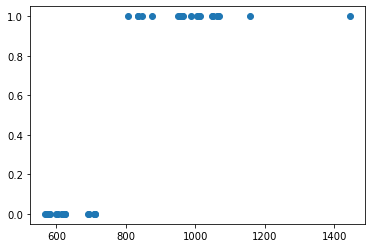

In [8]:
# 3-4-12
# 입력변수와 출력변수 생성하기
X_train = np.zeros((40,20))
y_train = np.zeros(40)

#인덱스번호 0~19번까지는 레이블 1(배고픔), 21~40번까지는 레이블 0(웃음)
y_train[0:20] = 1

# hungry_특징추출  
for i in range(20):
    audio_path = 'hungry/hungry_'+str(i+1)+'.wav'
    y, sr = librosa.load(audio_path)
    mfcc = librosa.feature.mfcc(y = y, sr = sr)
    temp = mfcc.mean(axis=1)
    X_train[i] = temp

# laugh_특징추출
for i in range(20):
    audio_path = 'laugh/laugh_'+str(i+1)+'.wav'
    y, sr = librosa.load(audio_path)
    mfcc = librosa.feature.mfcc(y = y, sr = sr)
    temp = mfcc.mean(axis=1) 
    X_train[i+20] = temp

# 추출한 특성 값들을 데이터 셋으로 묶기
# 데이터 셋
data_sets = np.zeros((40,21))
data_sets[:,0:20] = X_train
data_sets[:,20] = y_train

# 5-2. 학습 데이터 특성 시각화하기
# 시도2_기울기의 변화량만을 수집
def AccumAscentCurv(A):
    accVal = 0
    for i in range(len(A)-1):
        accVal = accVal + abs(A[i+1]-A[i])
    return accVal

X = [AccumAscentCurv(X_train[i]) for i in range(40)]
y = y_train

plt.scatter(X, y)
plt.show()